# Importing all required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
'''import statsmodels.api as sm
import datetime as dt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score,r2_score,mean_absolute_error,mean_squared_error,accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn import svm,metrics,tree,preprocessing,linear_model
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier, GradientBoostingRegressor
from sklearn.metrics import accuracy_score,mean_squared_error,recall_score,confusion_matrix,f1_score,roc_curve, auc
from plotly.offline import iplot, init_notebook_mode
import pickle'''
import warnings
warnings.filterwarnings("ignore") 
import datetime as dt
from datetime import datetime
import plotly.express as px


# read Data

In [2]:
df = pd.read_csv('D:/My_Project/supply chain/DataCoSupplyChainDataset.csv/DataCoSupplyChainDataset.csv', encoding='latin1')
df.head(3)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class


# Descriptive Data

In [3]:
df.shape

(180519, 53)

In [4]:
df.info()  #Checking the type of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [5]:
df.describe()  # statistical description

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,...,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,...,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,...,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,...,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,...,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,...,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,...,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


##### The Late Delivery Risk column in this dataset has the values 0 and 1, that is if there is a delay, the number 1 is assigned to the order, and if there is no delay, the number 0 is assigned to the order. According to the table above, the average of this feature is 0.548. So, it can be concluded that the number of delays is higher and this can lead to the loss of customers and, consequently, the loss of profit.

# Data cleaning

#### Missing Values

In [6]:
df.isna().mean()*100

Type                               0.000000
Days for shipping (real)           0.000000
Days for shipment (scheduled)      0.000000
Benefit per order                  0.000000
Sales per customer                 0.000000
Delivery Status                    0.000000
Late_delivery_risk                 0.000000
Category Id                        0.000000
Category Name                      0.000000
Customer City                      0.000000
Customer Country                   0.000000
Customer Email                     0.000000
Customer Fname                     0.000000
Customer Id                        0.000000
Customer Lname                     0.004432
Customer Password                  0.000000
Customer Segment                   0.000000
Customer State                     0.000000
Customer Street                    0.000000
Customer Zipcode                   0.001662
Department Id                      0.000000
Department Name                    0.000000
Latitude                        

##### as we se that there are missing values in 'Customer Lname ' , 'Customer Zipcode' , 'Order Zipcode' and 'Product Description' so I decide to inplace the  missing values in 'Customer Lname ' with (not defined) 

##### 'Order Zipcode', I decide to inplace the  missing values with 0 

##### 'Order Zipcode' and 'Product Description', I will drop  them since the percentage of missing values is 86.239676 and  100  respectively 

In [7]:
df['Customer Lname'] = df['Customer Lname'].fillna('not defined')
df['Order Zipcode'] = df['Order Zipcode'].fillna

In [8]:
df['Full_Name'] = df['Customer Fname'].astype(str) + df['Customer Lname'].astype(str)

#### Cleaning

In [9]:
df = df.drop(['Customer Email','Product Status','Customer Password','Customer Street','Customer Fname','Customer Lname',
           'Product Description','Product Image','Order Zipcode','Customer Zipcode'],axis= 1)

In [10]:
df.shape

(180519, 44)

In [11]:
df.columns # #Checking columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Id', 'Customer Segment', 'Customer State',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Product Card Id', 'Product Category Id', 'Product Name',
       'Product Price', 'shipping date (DateOrders)', 'Shipping Mode',
       'Full_Name'],
      dtype='object')

# Data Visualisation


##### find important parameters, data correlation is performed.

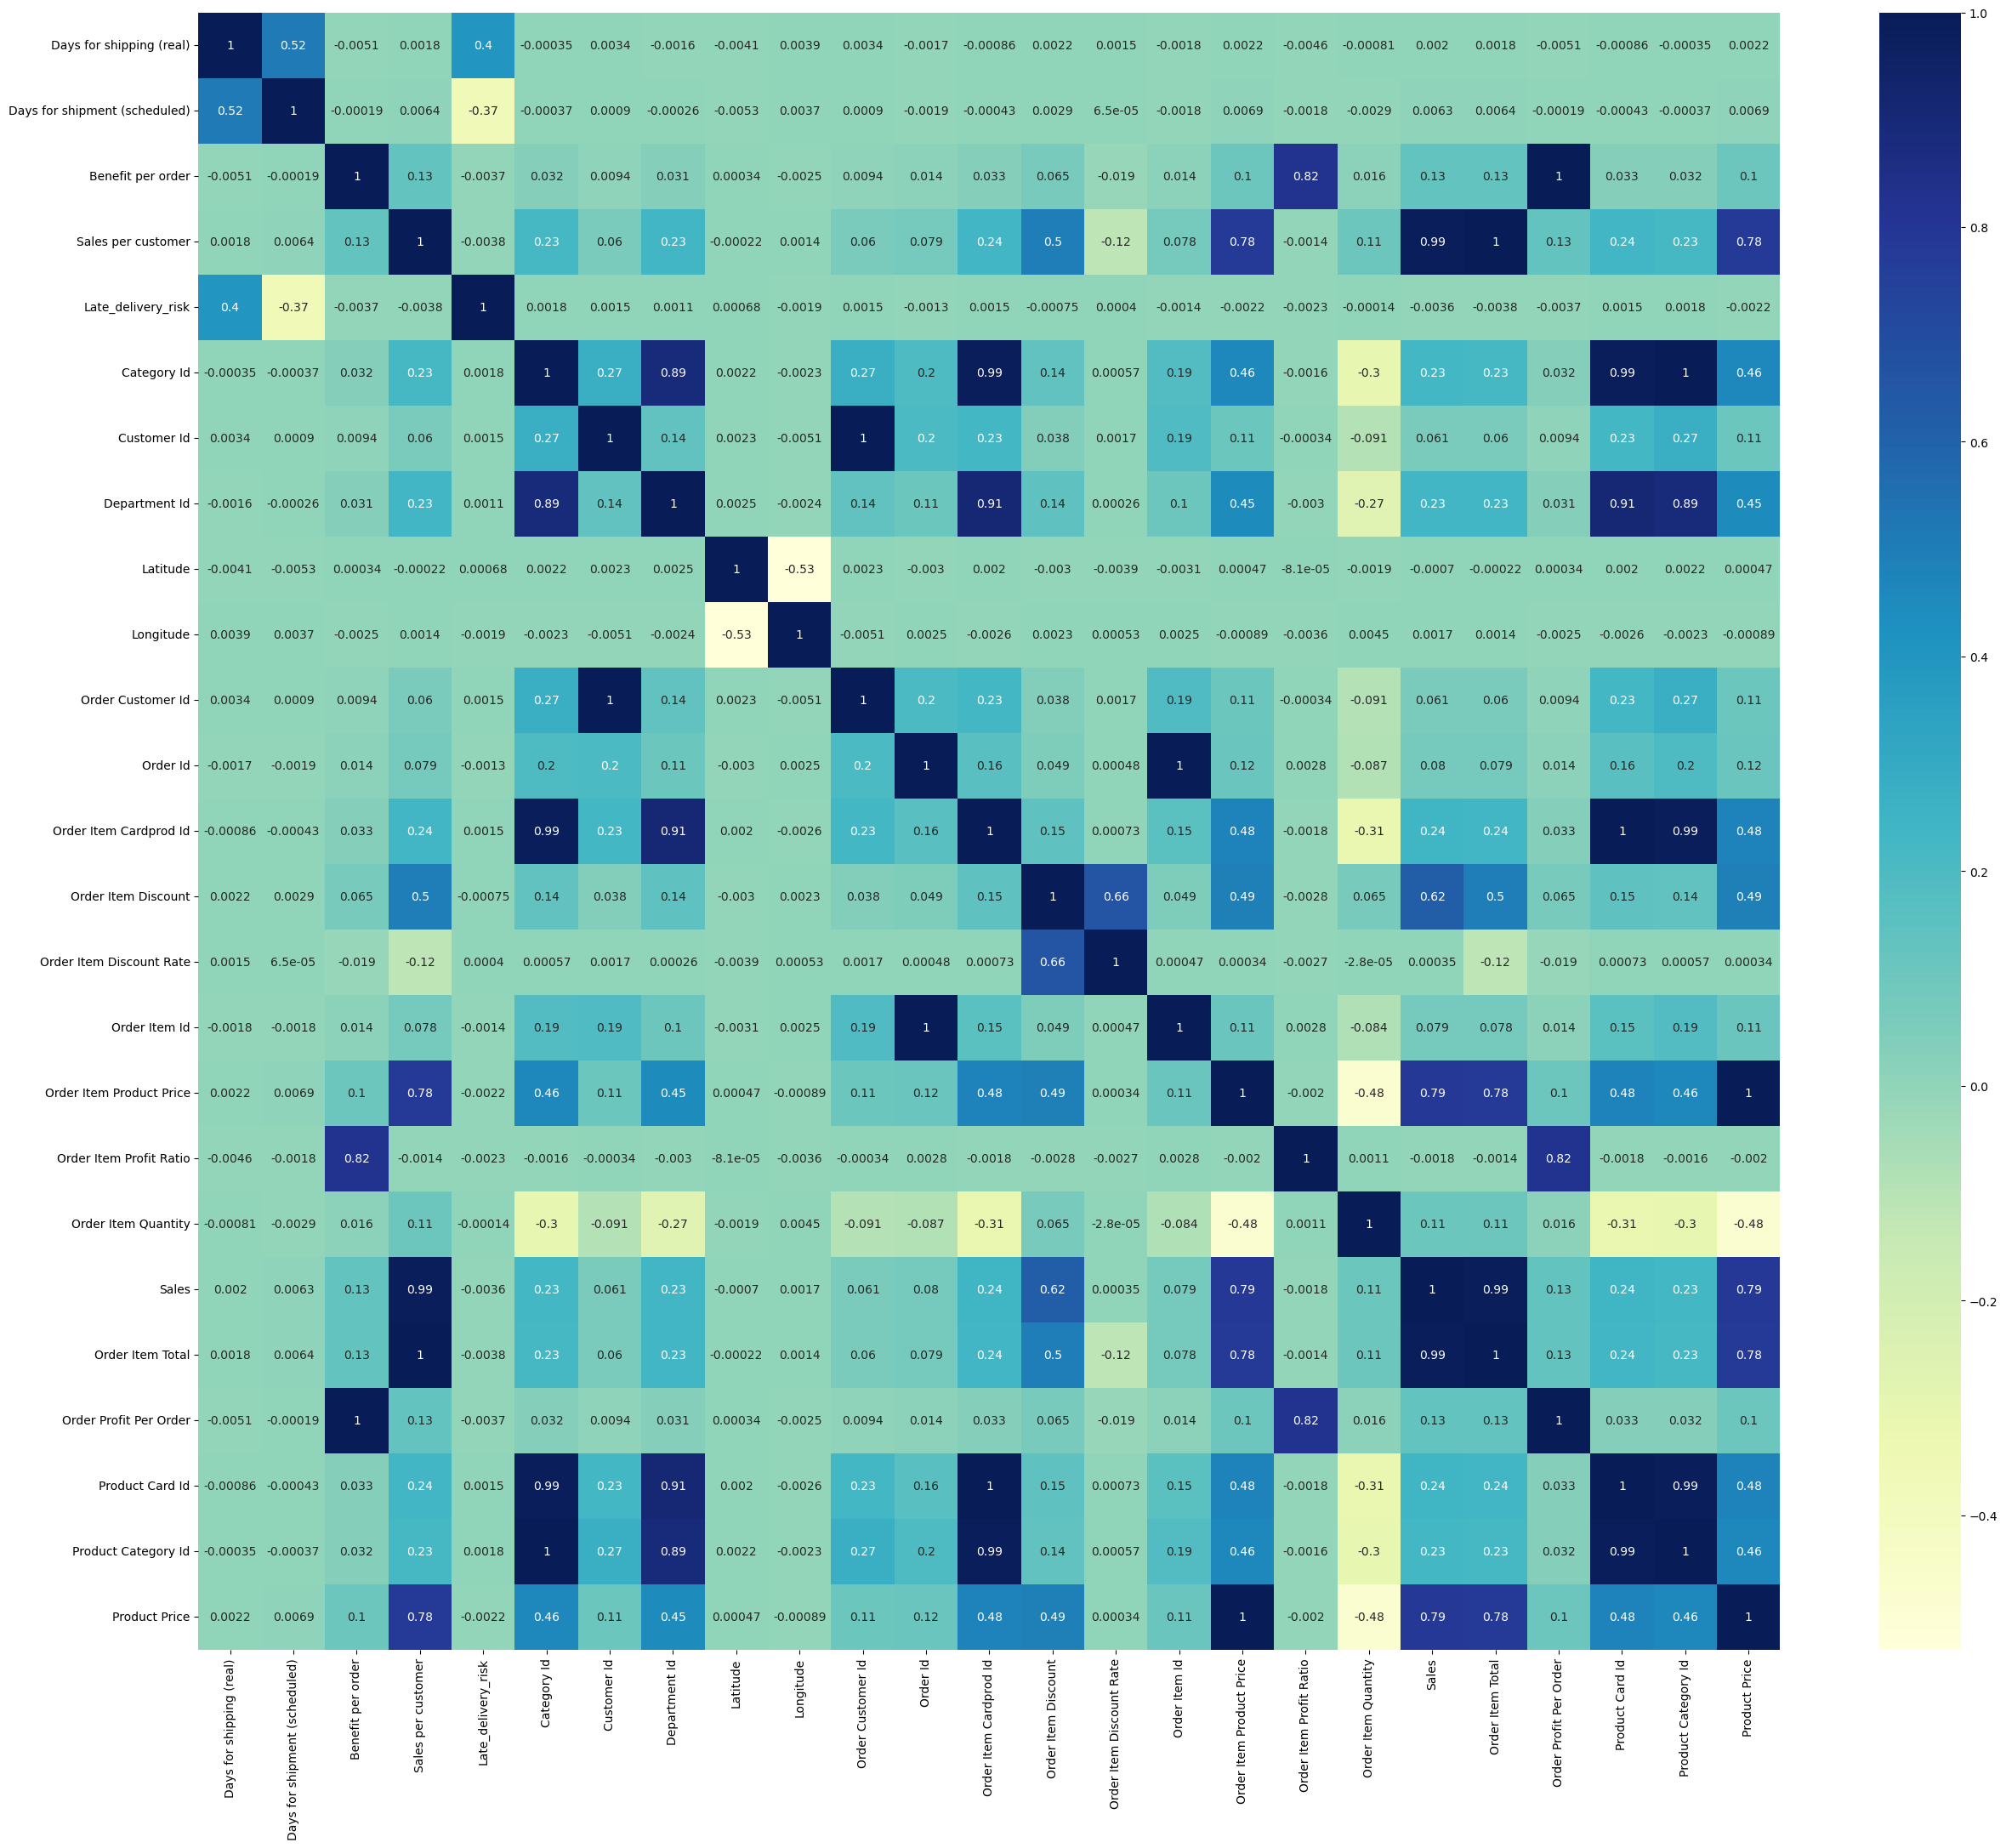

In [12]:
numeric_cols = df.select_dtypes(include='number').columns
corrmap = df[numeric_cols].corr()

plt.figure(figsize=(30,25))
sns.heatmap(corrmap, annot=True, cmap='YlGnBu')
plt.show()


## find duplicates

In [13]:
def find_duplicate_features(df):
    duplicated_features = []
    for i, col1 in enumerate(df.columns):
        for col2 in df.columns[i+1:]:
            if df[col1].equals(df[col2]):
                duplicated_features.append((col1, col2))
    return duplicated_features


In [14]:
duplicated_features = find_duplicate_features(df)
duplicated_features


[('Benefit per order', 'Order Profit Per Order'),
 ('Sales per customer', 'Order Item Total'),
 ('Category Id', 'Product Category Id'),
 ('Customer Id', 'Order Customer Id'),
 ('Order Item Cardprod Id', 'Product Card Id'),
 ('Order Item Product Price', 'Product Price')]

In [15]:
df = df.drop(['Order Profit Per Order','Order Item Total','Product Category Id','Order Customer Id','Order Item Cardprod Id','Order Item Product Price'], axis=1)

In [16]:
df.shape

(180519, 38)

In [17]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Sales,Order Region,Order State,Order Status,Product Card Id,Product Name,Product Price,shipping date (DateOrders),Shipping Mode,Full_Name
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,327.75,Southeast Asia,Java Occidental,COMPLETE,1360,Smart watch,327.75,2/3/2018 22:56,Standard Class,CallyHolloway
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,327.75,South Asia,Rajastán,PENDING,1360,Smart watch,327.75,1/18/2018 12:27,Standard Class,IreneLuna
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,327.75,South Asia,Rajastán,CLOSED,1360,Smart watch,327.75,1/17/2018 12:06,Standard Class,GillianMaldonado
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,327.75,Oceania,Queensland,COMPLETE,1360,Smart watch,327.75,1/16/2018 11:45,Standard Class,TanaTate
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,327.75,Oceania,Queensland,PENDING_PAYMENT,1360,Smart watch,327.75,1/15/2018 11:24,Standard Class,OrliHendricks


In [18]:
df['shipping date (DateOrders)'] = pd.to_datetime(df['shipping date (DateOrders)'])

# extract days, months, and years into separate columns
df['day_shipping'] = df['shipping date (DateOrders)'].dt.day
df['month_shipping'] = df['shipping date (DateOrders)'].dt.month
df['year_shipping'] = df['shipping date (DateOrders)'].dt.year

In [19]:
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'])

# extract days, months, and years into separate columns
df['day_order'] = df['order date (DateOrders)'].dt.day
df['month_order'] = df['order date (DateOrders)'].dt.month
df['year_order'] = df['order date (DateOrders)'].dt.year

In [20]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Product Price,shipping date (DateOrders),Shipping Mode,Full_Name,day_shipping,month_shipping,year_shipping,day_order,month_order,year_order
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,327.75,2018-02-03 22:56:00,Standard Class,CallyHolloway,3,2,2018,31,1,2018
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,327.75,2018-01-18 12:27:00,Standard Class,IreneLuna,18,1,2018,13,1,2018
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,327.75,2018-01-17 12:06:00,Standard Class,GillianMaldonado,17,1,2018,13,1,2018
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,327.75,2018-01-16 11:45:00,Standard Class,TanaTate,16,1,2018,13,1,2018
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,327.75,2018-01-15 11:24:00,Standard Class,OrliHendricks,15,1,2018,13,1,2018


In [21]:
df.to_csv('clean_data.csv',index=False)